In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#William Connor Parham
#Dr. Hairong Qi
#COSC 522
#Project 1
#9/19/2023

**Read In Training and Testing Set**

Text(0.5, 1.0, 'Positive and Negative Synthetic Data')

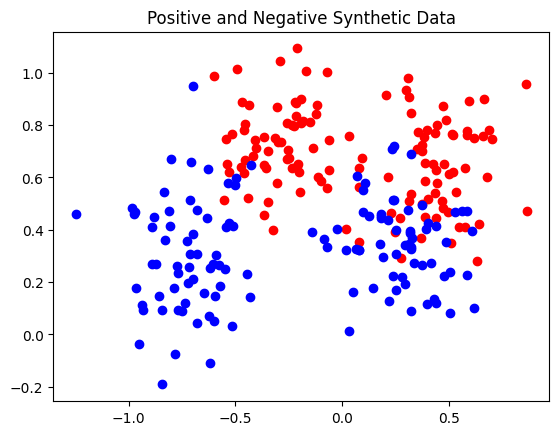

In [25]:
#Read in the training and testing set
training_set = pd.read_csv('synth.tr', delim_whitespace=True)
testing_set = pd.read_csv('synth.te', delim_whitespace=True)
# print(training_set)
# print(testing_set)

df_pos = training_set.loc[training_set['yc'] == 1]
df_neg = training_set.loc[training_set['yc'] == 0]
df_pos_x = df_pos['xs']
df_pos_y = df_pos['ys']

df_neg_x = df_neg['xs']
df_neg_y = df_neg['ys']

plt.scatter(df_pos_x, df_pos_y,c='red')
plt.scatter(df_neg_x, df_neg_y, c='blue')
plt.title('Positive and Negative Synthetic training Data')

**K-Nearest Neighbor Implementation**

In [3]:
class KNN_Classifier:
    def __init__(self, k=1):
        self.n_neighbors = k

    def euclidian_distance(self, a, b):
        eucl_distance = 0.0

        for index in range(len(a)):
            eucl_distance += (a[index] - b[index] ** 2)
            euclidian_distance = np.sqrt(eucl_distance)
        
        return euclidian_distance


    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict_knn(self, X): 
        #initialize prediction_knn as empty list 
        prediction_knn = []

        for index in range(len(X)):
            #initialize euclidian distances as empty list
            euclidian_distances = []

            for row in self.X_train:
                #for every row in X_train, find eucl_distance to X using
                #euclidian_distance() and append to euclidian_distances list
                eucl_distance = self.euclidian_distance(row, X[index])
                euclidian_distances.append(eucl_distance)
            
            #sort euclidian_distances in ascending order, and retain only k
            #neighbors as specified in n_neighbors(n_neighbors=k)
            neighbors = np.array(euclidian_distances).argsort()[: self.n_neighbors]

            #initialize dict to count class occurrences in y_train
            count_neighbors = {}

            for val in neighbors:
                if self.y_train[val] in count_neighbors:
                    count_neighbors[self.y_train[val]] += 1
                else:
                    count_neighbors[self.y_tain[val]] = 1
                
            #max count labels to prediction_knn
            prediction_knn.append(max(count_neighbors, key=count_neighbors.get))
        
        return prediction_knn
    
    def display_knn(self, x):

        #initialize euclidian_distances as empty list
        euclidian_distances = []

        #for every row in X_train, find eucl_distance to x
        #using euclidian_distance() and append to euclidian_distances list
        for row in self.X_train:
            eucl_distance = self.euclidian_distance(row,x)
            euclidian_distances.append(eucl_distance)
        
        #sort euclidian-distances in ascneding order, and retain only k
        #neighbors as specified in n_neighbors (n_neighbors = k)
        neighbors = np.array(euclidian_distances).argsort()[: self.n_neighbors]

        #initiate empty display_knn_values list
        display_knn_values = []

        for index in range(len(neighbors)):
            neighbor_index = neighbors[index]
            e_distances = euclidian_distances[index]
            display_knn_values.append((neighbor_index, e_distances))
        
        return display_knn_values


**Minimum Euclidian Distance Classifier**

In [4]:
class MinimumDistanceClassifier:
    def __init__(self):
        self.class_means = None
    
    def fit(self, X, y):
        """
        Fit the classifier to the training data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features)
          Training data.
        - y: numpy array, shape (n_samples,)
          Class labels for each data point.

        Returns:
        - self
        """
        #Calculate class means
        unique_classes = np.unique(y)
        self.class_means = np.array([X[y == c].mean(axis=0) for c in unique_classes])
        return self


    def predict(self, X):
        """
        Predict class labels for new data.

        Parameters:
        - X: numpy array, shape (n_samples, n_features)
          New data points.

        Returns:
        - y_pred: numpy array, shape (n_samples,)
          Predicted class labels for each new data point.
        """
        if self.class_means is None:
            raise ValueError("Classifier has not been fitted.")

        n_samples = X.shape[0]
        n_classes = self.class_means.shape[0]

        #compute pairwise distances between data points and class means
        distances = np.zeros((n_samples, n_classes))

        for i in range(n_samples):
            for j in range(n_classes):
                distances[i, j] = np.linalg.norm(X[i]-self.class_means[j])

        #assign each data point to the class with the minimum distance
        y_pred = np.argmin(distances, axis=1)
        return y_pred
    
    '''
    # Example usage:
    if __name__ == "__main__":
    # Generate some example data
    np.random.seed(0)
    X_train = np.random.rand(100, 2)  # 100 samples, 2 features
    y_train = np.random.randint(0, 3, 100)  # 3 classes

    # Create and fit the classifier
    clf = MinimumDistanceClassifier()
    clf.fit(X_train, y_train)

    # Generate some test data
    X_test = np.random.rand(10, 2)  # 10 test samples

    # Make predictions
    y_pred = clf.predict(X_test)

    print("Predicted class labels for test data:", y_pred)
    '''

**Minimum Mahalanobis Distance Classifier Implementation**


In [5]:
class MinimumMahalanobisDistanceClassifier:
    def __init__(self):
        self.class_centroids = None
        self.covariance_matrices = None
        self.num_classes = 0

    def fit(self, X_train, y_train):
        self.num_classes = np.max(y_train) + 1
        self.class_centroids = np.empty((self.num_classes, X_train.shape[1]))
        self.covariance_matrices = np.empty((self.num_classes, X_train.shape[1], X_train.shape[1]))

        for c in range(self.num_classes):
            class_data = X_train[y_train == c]
            self.class_centroids[c] = np.mean(class_data, axis=0)
            self.covariance_matrices[c] = np.cov(class_data, rowvar=False)

    def mahalanobis_distance(self, x, class_index):
        x_minus_mean = x - self.class_centroids[class_index]
        inv_cov_matrix = np.linalg.inv(self.covariance_matrices[class_index])
        distance = np.sqrt(np.dot(x_minus_mean, np.dot(inv_cov_matrix, x_minus_mean)))
        return distance

    def predict(self, X_test):
        if self.class_centroids is None or self.covariance_matrices is None:
            raise ValueError("The classifier has not been trained.")

        num_samples = X_test.shape[0]
        predictions = np.empty(num_samples, dtype=int)

        for i in range(num_samples):
            min_distance = float('inf')
            min_class = -1

            for c in range(self.num_classes):
                distance = self.mahalanobis_distance(X_test[i], c)
                if distance < min_distance:
                    min_distance = distance
                    min_class = c

            predictions[i] = min_class

        return predictions
    
    '''
    # Example usage:
    if __name__ == "__main__":
    # Sample data
    X_train = np.array([[1, 2], [2, 3], [3, 4], [8, 9], [9, 10], [10, 11]])
    y_train = np.array([0, 0, 0, 1, 1, 1])
    X_test = np.array([[2.5, 3.5], [9, 10.5]])

    # Create and train the classifier
    classifier = MinimumMahalanobisDistanceClassifier()
    classifier.fit(X_train, y_train)

    # Make predictions
    predictions = classifier.predict(X_test)
    print("Predictions:", predictions)
    '''

**Baysian Decision Classifier Quadratic**

In [8]:
# Step 1: Collect and preprocess your dataset
# X_train: Training data features (N x D), where N is the number of samples, and D is the number of features.
# y_train: Training data labels (N,)
# X_test: Test data features (M x D), where M is the number of test samples.

X_train = 0
y_train = 0
X_test = 0

def estimate_parameters(X, y):
    unique_classes = np.unique(y)
    class_priors = []
    class_means = []
    class_covs = []

    for c in unique_classes:
        X_c = X[y == c]
        class_priors.append(len(X_c) / len(X))
        class_means.append(np.mean(X_c, axis=0))
        class_covs.append(np.cov(X_c, rowvar=False))

    return class_priors, class_means, class_covs

#class_priors, class_means, class_covs = estimate_parameters(X_train, y_train)

# Step 3: Implement the quadratic discriminant function
def quadratic_discriminant(x, class_prior, class_mean, class_cov):
    # Compute the log-likelihood of the data given the class
    x_minus_mean = x - class_mean
    exponent = -0.5 * np.dot(np.dot(x_minus_mean.T, np.linalg.inv(class_cov)), x_minus_mean)
    log_likelihood = -0.5 * np.log(np.linalg.det(class_cov)) + exponent

    # Combine log-likelihood with class prior
    posterior = log_likelihood + np.log(class_prior)

    return posterior

# Step 4: Make predictions using the classifier
def predict(X, class_priors, class_means, class_covs):
    predictions = []

    for x in X:
        class_scores = []

        for i in range(len(class_priors)):
            posterior = quadratic_discriminant(x, class_priors[i], class_means[i], class_covs[i])
            class_scores.append(posterior)

        predicted_class = np.argmax(class_scores)
        predictions.append(predicted_class)

    return np.array(predictions)

# # Use the predict function on the test data
# y_pred = predict(X_test, class_priors, class_means, class_covs)